# Jamboree Education - Linear Regression Case Study

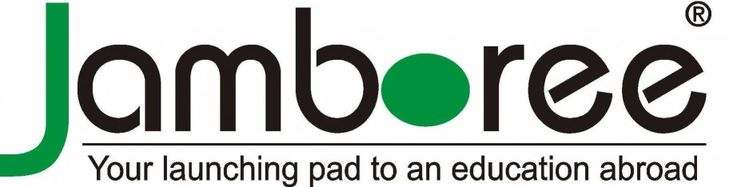

## About Data

- Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven problem-solving methods, they have helped students achieve exceptional scores on exams like GMAT, GRE, and SAT with minimal effort.

- To further support students, Jamboree has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.

- By conducting a thorough analysis, we can assist Jamboree in understanding the crucial factors impacting graduate admissions and their interrelationships. Additionally, we can provide predictive insights to determine an individual's admission chances based on various variables.



## Why this Case Study

- Solving this business case holds immense importance for aspiring data scientists and ML engineers.

- Building predictive models using machine learning is widely popular among the data scientists/ML engineers. By working through this case study, individuals gain hands-on experience and practical skills in the field.

- Additionally, it will enhance one's ability to communicate with the stakeholders involved in data-related projects and help the organization take better, data-driven decisions.



## Objective

As a data scientist/ML engineer hired by Jamboree, your primary objective is toanalyze the given dataset and derive valuable insights from it. Additionally, utilize the dataset to construct a predictive model capable of estimating an applicant's likelihood of admission based on the available features.Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import statsmodels.stats.api as sma

import warnings
warnings.filterwarnings('ignore')

In [98]:
df=pd.read_csv("Jamboree_Admission.csv")

In [99]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [100]:
df.shape

(500, 9)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [102]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [103]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [104]:
df.drop("Serial No.",axis=1,inplace=True)

In [105]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [106]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [107]:
df.duplicated().sum()

0

In [108]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [109]:
df = df.rename(columns={'Chance of Admit ': 'Chances_of_Admit'})

In [119]:
cat_cols=["University Rating", "SOP", "LOR ", "Research"]
num_cols=["GRE Score", "TOEFL Score", "CGPA", "Chances_of_Admit"]

In [151]:
for i in df.columns:
    print()
    print(f"Range of {i} column is from {df[i].min()} to {df[i].max()}")
    print()
    print('-'*200)


Range of GRE Score column is from 290 to 340

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Range of TOEFL Score column is from 92 to 120

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Range of University Rating column is from 1 to 5

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Range of SOP column is from 1.0 to 5.0

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Range of

### From the above EDA we can see that our data has no null/missing values .
### Also there are no duplicates available in data.
### We have eight columns and 500 rows in this data.
### As our data is pretty much clean so we can move ahead for further exploration and data anlysis.

## Univariate Analysis

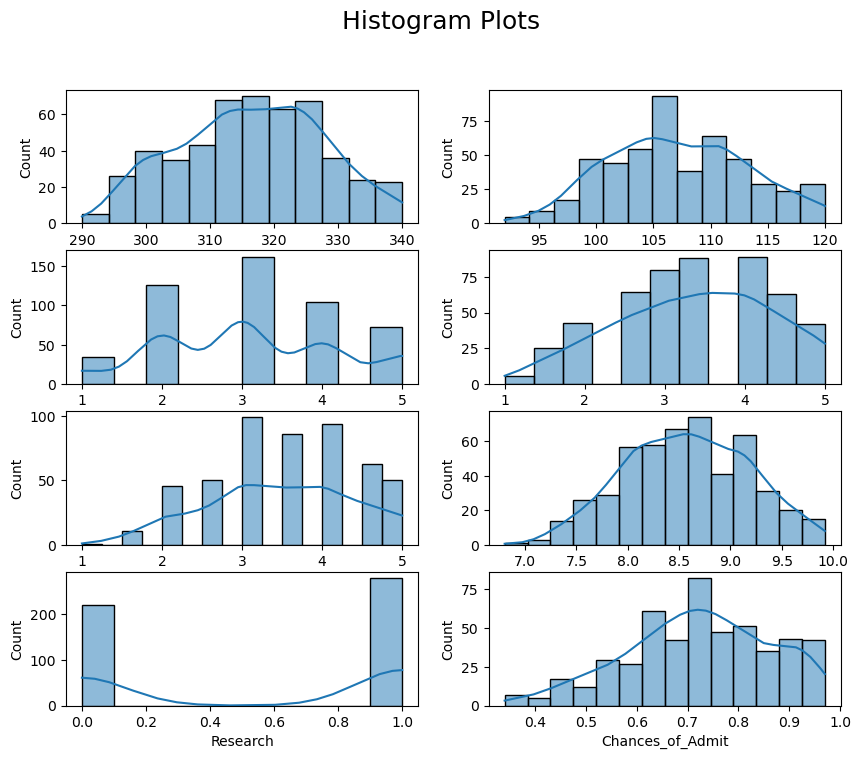

In [148]:
fig = plt.figure(figsize=(10,8)) 
for i,col in enumerate(df.columns,1):
    plt.subplot(4,2,i)
    sns.histplot(x=col,data=df,kde=True) 
plt.suptitle("Histogram Plots",fontsize=18)
plt.show()

### Box Plot for outlier detection

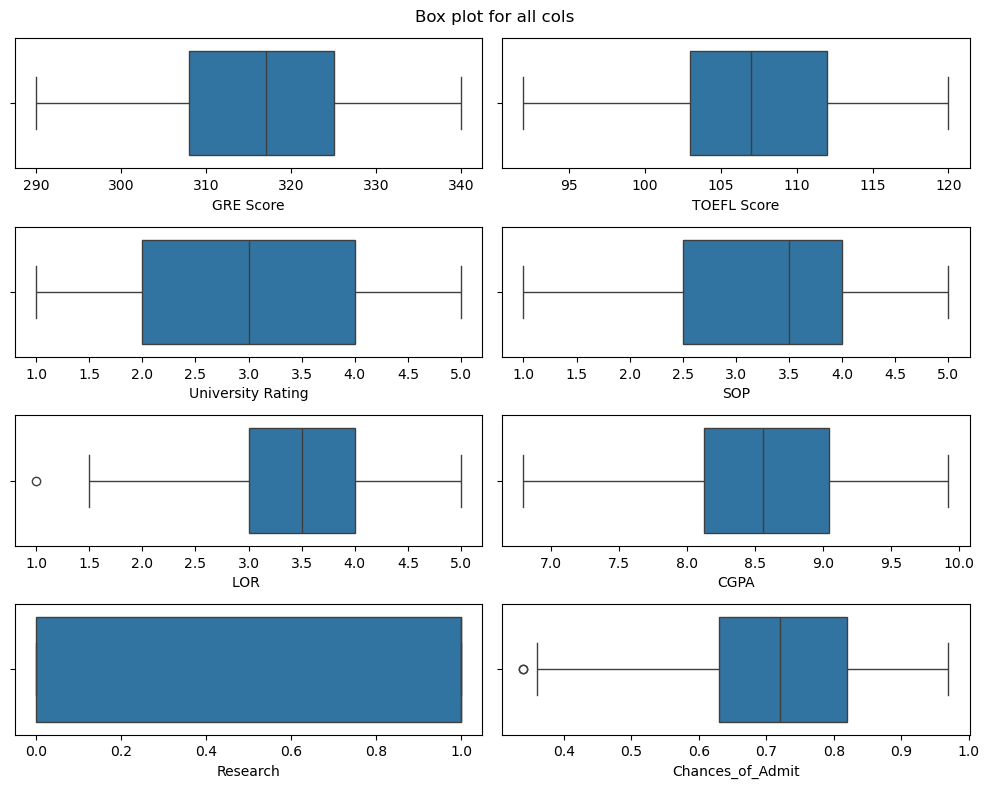

In [149]:
fig = plt.figure(figsize=(10,8)) 
for i,col in enumerate(df.columns,1):
    plt.subplot(4,2,i)
    sns.boxplot(x=col,data=df) 
fig.suptitle("Box plot for all cols") 
plt.tight_layout()
plt.show()

**From the boxplots we can infer that we don't have outliers in any columns except LOR and Chance of Admit but scale of these two columns are very less so we don't need to remove outliers from these two columns.**

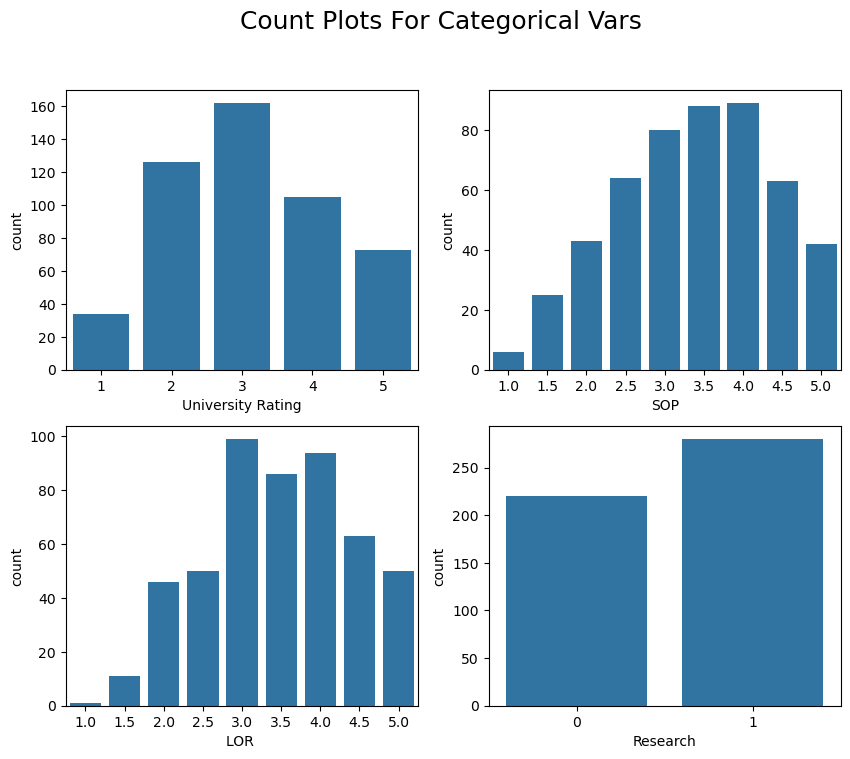

In [130]:
fig = plt.figure(figsize=(10,8)) 
for i,col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(x=col,data=df) 
fig.suptitle("Count Plots For Categorical Vars",fontsize=18)

plt.show()

## Bivariate Analysis

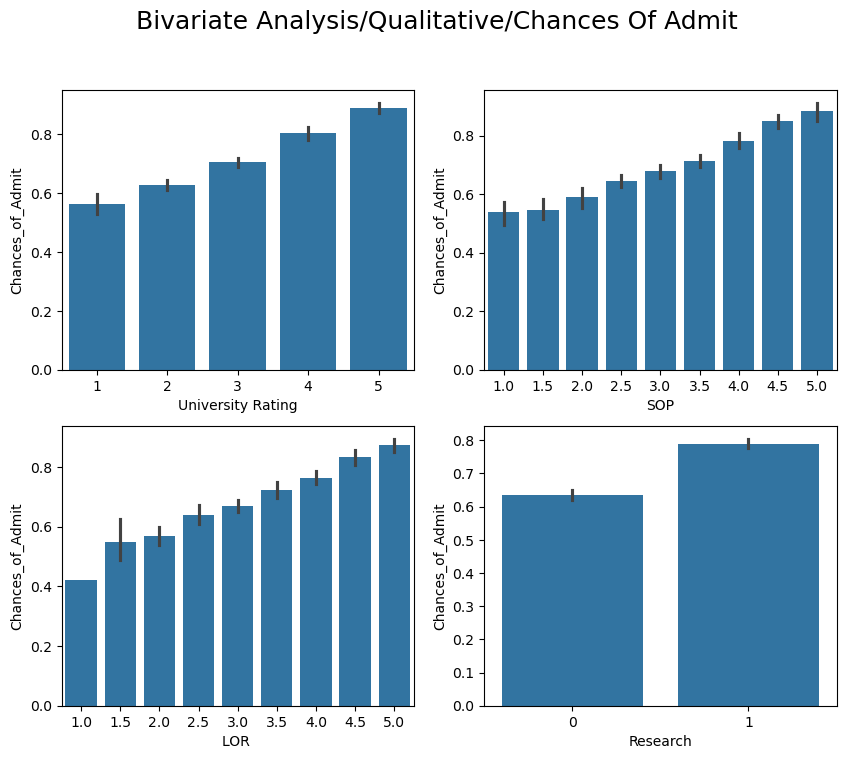

In [150]:
fig = plt.figure(figsize=(10,8)).suptitle("Bivariate Analysis/Qualitative/Chances Of Admit",fontsize=18) 
for i,col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.barplot(x=col,y="Chances_of_Admit", data=df) 
plt.tight_layout
plt.show()

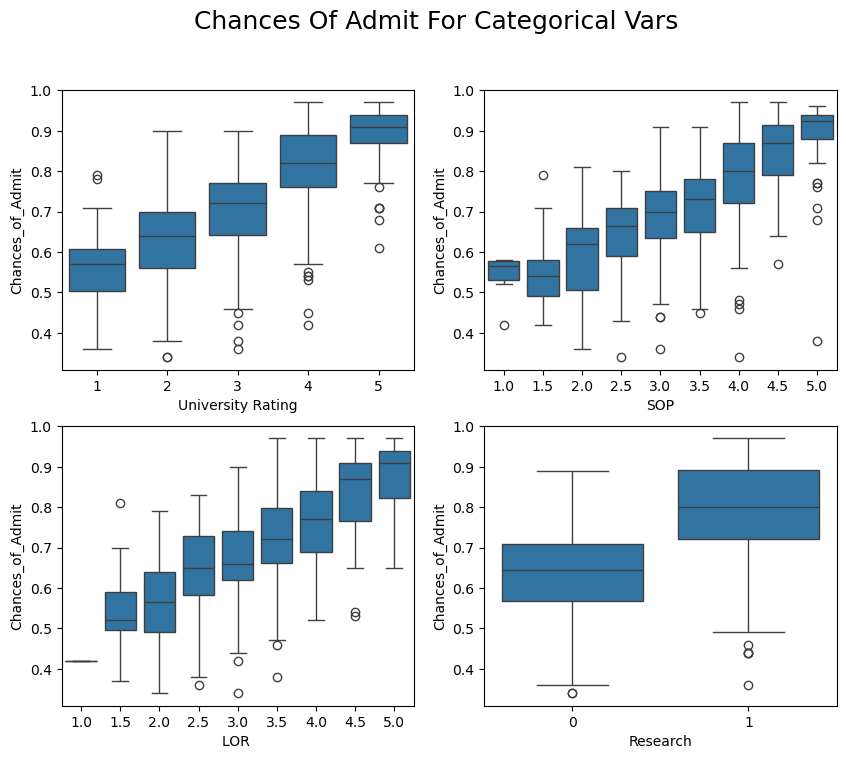

In [147]:
fig = plt.figure(figsize=(10,8)) 
for i,col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(x=col,y="Chances_of_Admit",data=df) 
fig.suptitle("Chances Of Admit For Categorical Vars",fontsize=18)
plt.show()

## Multivariate Analysis

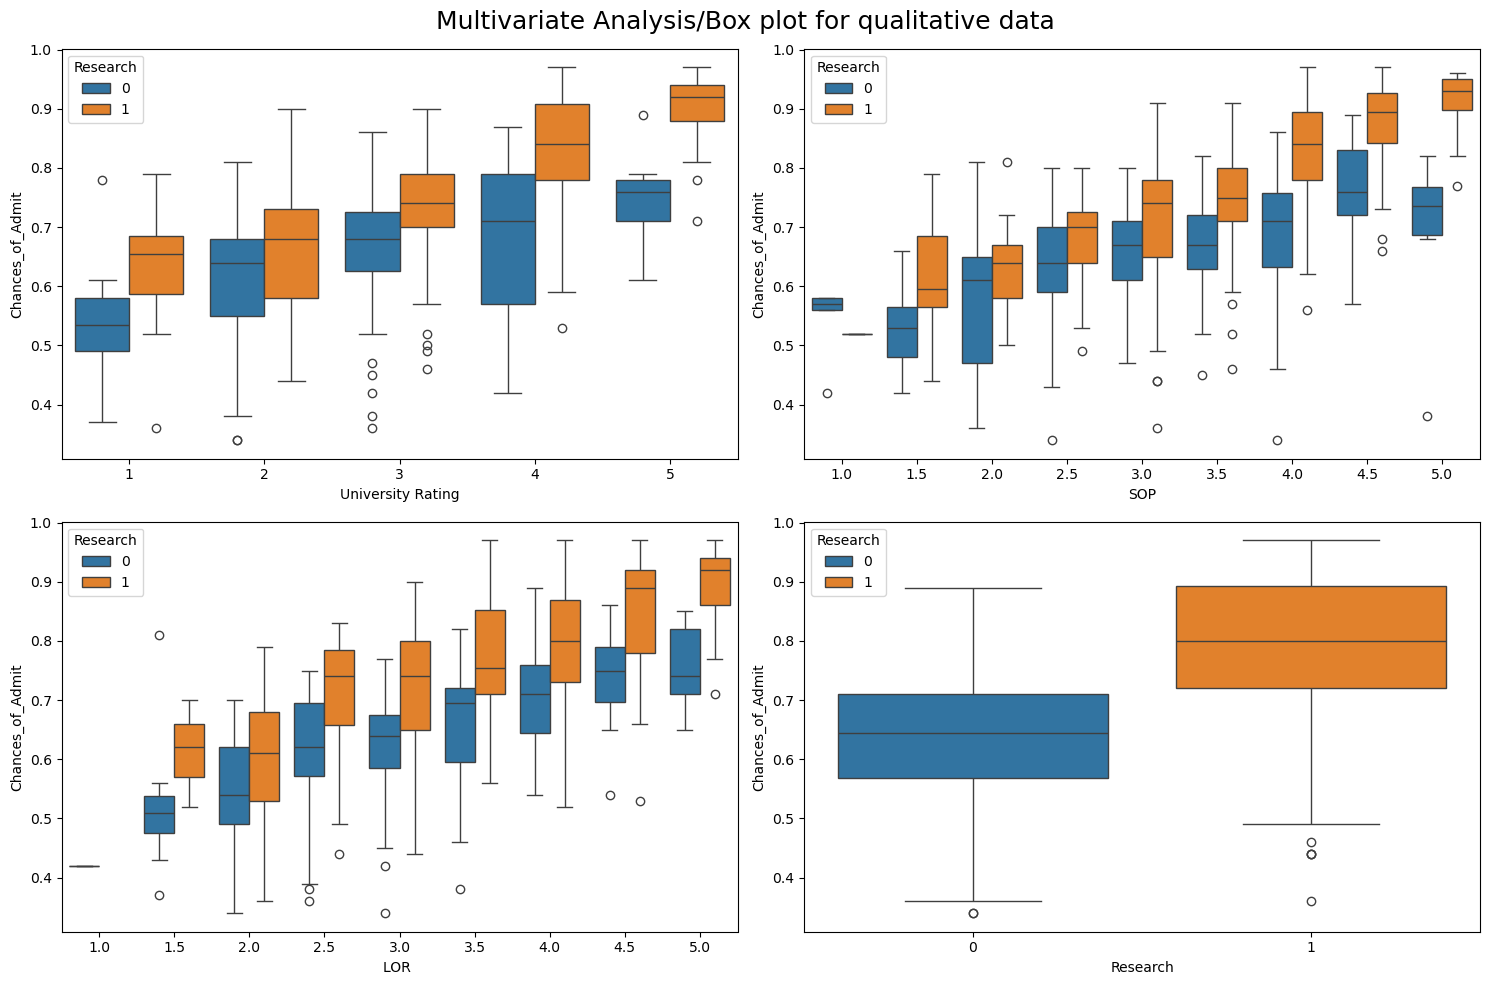

In [146]:
fig = plt.figure(figsize=(15,10)).suptitle("Multivariate Analysis/Box plot for qualitative data",fontsize=18)
for i,col in enumerate(cat_cols,1):
    plt.subplot(2,2,i)
    sns.boxplot(x=col,y="Chances_of_Admit",hue="Research", data=df) 
plt.tight_layout()
plt.show()

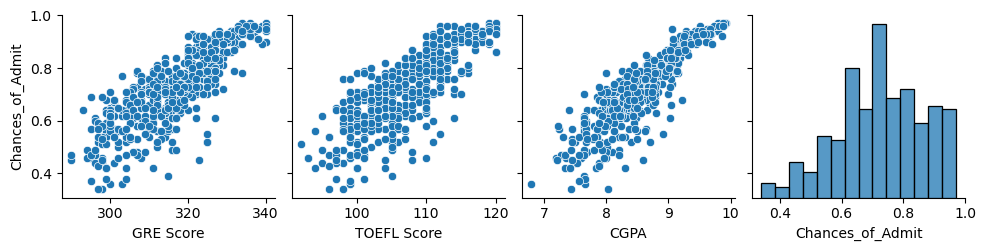

In [127]:
sns.pairplot(y_vars="Chances_of_Admit",data=df[num_cols])
plt.show()

### Relationship Between Variables

In [132]:
cr=df.corr()
cr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chances_of_Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chances_of_Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


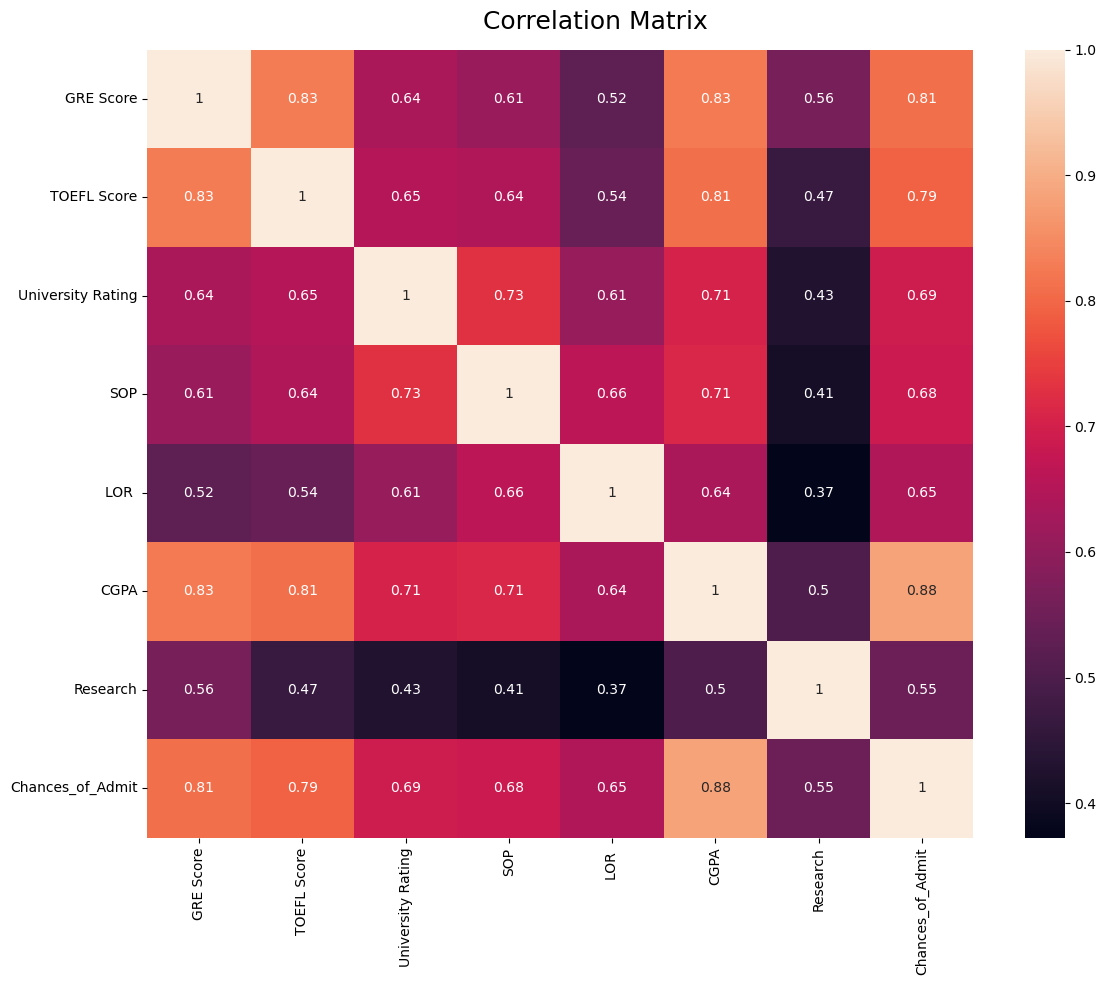

In [133]:
fig = plt.figure(figsize=(12,10)).suptitle("Correlation Matrix",fontsize=18) 
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()
plt.show()

### Insights
- From the unique values stat we can see that there are some categorical variables which is in int format so we can change it to categorical variable.
- From bivariate analysis we can infer that greater is the SOP, LOR, University Rating greater the chance of admit.
- From multivariate analysis we can infer that having research as 1 is impacting significantly the admit chance in adittion to all other factors.
- From the pair plot we can see that there is a linear relationship between numerical colums(scores & CGPA) and chance of admit.
- From boxplot we can conclude that we don't have any outlier as such .
- Also from correlation matrix we can see than there is high correlation between independent variables.

### Data Preprocessing

In [152]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chances_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [160]:
x=df.drop("Chances_of_Admit",axis=1)
y=df["Chances_of_Admit"]

In [161]:
x.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


In [162]:
y.head(2)

0    0.92
1    0.76
Name: Chances_of_Admit, dtype: float64

In [420]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [421]:
sc = StandardScaler()
X_train_t = sc.fit_transform(X_train)
X_test_t = sc.transform(X_test)

In [422]:
model = LinearRegression()
model.fit(X_train_t, y_train)

LinearRegression()

In [423]:
model.coef_

array([0.02091007, 0.01965792, 0.00701103, 0.00304937, 0.01352815,
       0.07069295, 0.00988992])

In [424]:
model.intercept_

0.7209250000000001

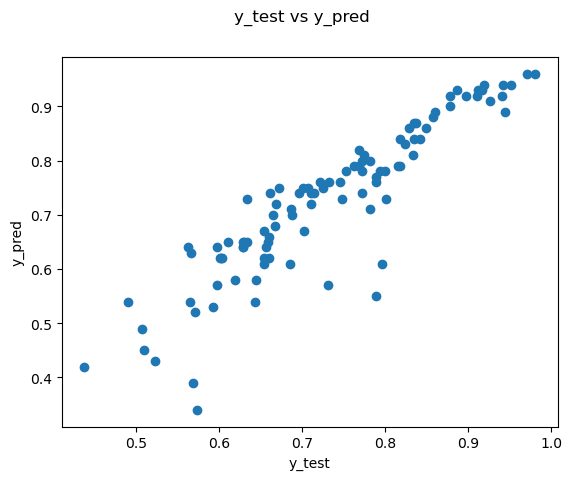

In [426]:
fig = plt.figure()
y_hat = model.predict(X_test_t)
plt.scatter(y_hat,y_test)
fig.suptitle('y_test vs y_pred') 
plt.xlabel('y_test')
plt.ylabel('y_pred') 

plt.show()

In [175]:
model.score(X_train_t, y_train)

0.8215099192361264

In [176]:
model.score(X_test_t, y_test)

0.8208741703103732

In [194]:
df1 = pd.DataFrame(list(zip(X_train.columns,np.abs(model.coef_))),columns=["feature", "coeff"])
df1

,feature,coeff
0,GRE Score,0.020910
1,TOEFL Score,0.019658
2,University Rating,0.007011
3,SOP,0.003049
4,LOR,0.013528
5,CGPA,0.070693
6,Research,0.009890


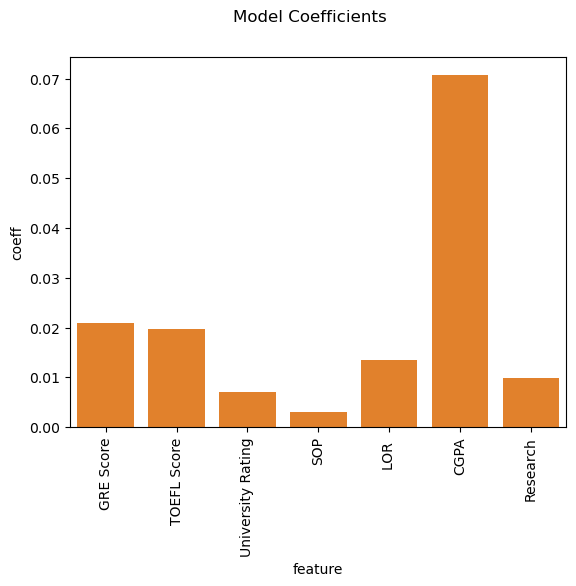

In [192]:
sns.barplot(x="feature", y="coeff", data=df1)
plt.xticks(rotation=90)
plt.suptitle("Model Coefficients")
plt.show()

**without feature engineering and  using any regularization we get train score of 0.82 and test score of 0.82 which is good**

### Metrics Evaluation

In [391]:
def adj_r2(X, Y, r2_score):
  return 1 - ((1-r2_score)*(len(Y)-1))/(len(Y)-X.shape[1]-1)

In [394]:
train_score = adj_r2(X_train_t, y_train, model.score(X_train_t, y_train))
test_score= adj_r2(X_test_t, y_test, model.score(X_test_t, y_test))

In [288]:
y_pred_train = model.predict(X_train_t)
y_pred_test = model.predict(X_test_t)

In [239]:
print(f"R2_score:                Train:{model.score(X_train_t, y_train)}      Test:{model.score(X_test_t, y_test)}")
print(f"Adjusted-R2-score:       Train:{train_score}      Test:{test_score} ")
print(f"Mean Absolute Error:     Train:{mean_absolute_error(y_train, y_pred_train)}     Test:{mean_absolute_error(y_test, y_pred_test)} ")
print(f"Mean Squared Error:      Train:{mean_squared_error(y_train, y_pred_train)}   Test:{mean_squared_error(y_test, y_pred_test)} ")
print(f"Root Mean Squared Error: Train:{np.sqrt(mean_squared_error(y_train, y_pred_train))}      Test:{np.sqrt(mean_squared_error(y_test, y_pred_test))} ")

R2_score:                Train:0.8215099192361264      Test:0.8208741703103732
Adjusted-R2-score:       Train:0.8183225963653429      Test:0.8072450310948581 
Mean Absolute Error:     Train:0.04294488315548092     Test:0.040200193804157944 
Mean Squared Error:      Train:0.0035733525638779683   Test:0.0034590988971363824 
Root Mean Squared Error: Train:0.0597775255750685      Test:0.05881410457650769 


### Regularization

In [248]:
models = [
     ["Linear Regression :", LinearRegression()],
     ["Lasso Regression :", Lasso(alpha=0.1)], 
     ["Ridge Regression :", Ridge(alpha=1.0)] 
        ]
print("Results after applying L1 and L2 Regularization")
print()
for name,model in models:
    model.fit(X_train_t, y_train)
    y_pred_train = model.predict(X_train_t)
    y_pred_test = model.predict(X_test_t)
    print(f"{name} Train Score:{(model.score(X_train_t, y_train))}      Test Score: {(model.score(X_test_t, y_test))}")
    print(f"{name} Train RMSE:{np.sqrt(mean_squared_error(y_train, y_pred_train))}       Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
    print("-"*260)

Results after applying L1 and L2 Regularization

Linear Regression : Train Score:0.8215099192361264      Test Score: 0.8208741703103732
Linear Regression : Train RMSE:0.0597775255750685       Test RMSE: 0.05881410457650769
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Lasso Regression : Train Score:0.2794146013279152      Test Score: 0.27980275949657774
Lasso Regression : Train RMSE:0.120108465853088       Test RMSE: 0.11793103455563166
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ridge Regression : Train Score:0.8215053669713202      Test Score: 0.82076968066824

## LinearRegression using Statsmodel

In [251]:
df2 = pd.DataFrame(X_train_t,columns=X_train.columns)

In [258]:
X_sm = sm.add_constant(df2)
sm_model = sm.OLS(y_train.values, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          2.10e-142
Time:                        17:21:34   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

**From the above table we can see that all columns except SOP has low p_value which implies their significance in model.**
**As SOP has higher p_value and low coef,it implies it is not relevant in the model, so we can drop it.**

In [262]:
X_sm_new = X_sm.drop("SOP",axis=1)
sm_model_new = sm.OLS(y_train.values, X_sm_new).fit()
print(sm_model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     301.1
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          1.38e-143
Time:                        17:32:04   Log-Likelihood:                 559.10
No. Observations:                 400   AIC:                            -1104.
Df Residuals:                     393   BIC:                            -1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7209      0.00

**After dropping SOP there is not effect on R2_score which confirm that,SOP was not an important feature.**

**Now all features have low p-value so we won't drop any feature further because all the features are important for model now.**

## Assumption of LinearRegression Model

### 1. Multicollinearity check

### VIF(Variance Inflation Factor)

In [375]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train_t, columns=X_train.columns)
vif["Features"] = X_t.columns
vif["VIF"] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,4.88
5,CGPA,4.75
1,TOEFL Score,4.26
3,SOP,2.92
2,University Rating,2.80
4,LOR,2.08
6,Research,1.51


**As all the features have VIF < 5, so we can say that there is no as such multicollinearity amongst the features.**

### 2. Mean of Residuals

In [289]:
residuals_train = y_train.values-y_pred_train
residuals_test = y_test.values-y_pred_test
mean_residuals_train = np.mean(residuals_train)
mean_residuals_test = np.mean(residuals_test)
print(f"Mean of Train Residuals : {mean_residuals_train}")
print(f"Mean of Test Residuals : {mean_residuals_test}")

Mean of Train Residuals : -4.5519144009631415e-17
Mean of Test Residuals : -0.005706590389232276


**Mean of both train and test residuals is close to zero which explain our model have fitted on the data well.**

### 3. Linearity

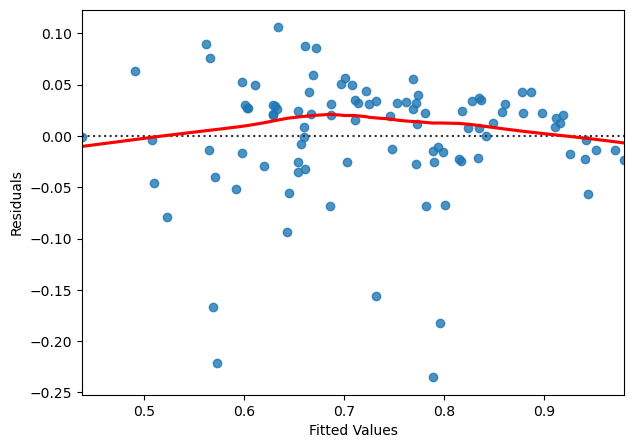

In [368]:
fig = plt.figure(figsize=(7,5))
sns.residplot(x=y_pred_test, y=residuals_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

**In a linear regression model, the residuals are randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.**

### 4. Normality of Residuals

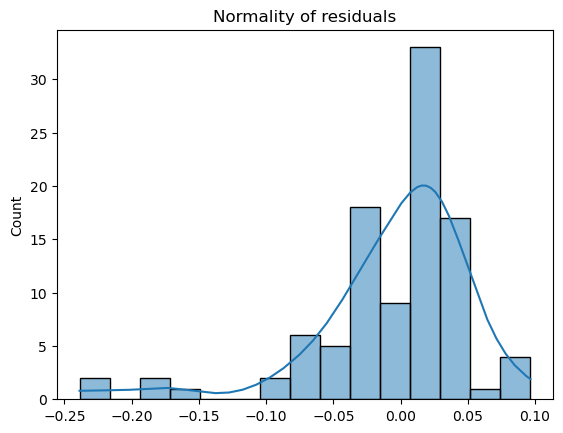

In [290]:
sns.histplot(residuals_test,kde=True)
plt.title('Normality of residuals')
plt.show()

<Figure size 1000x800 with 0 Axes>

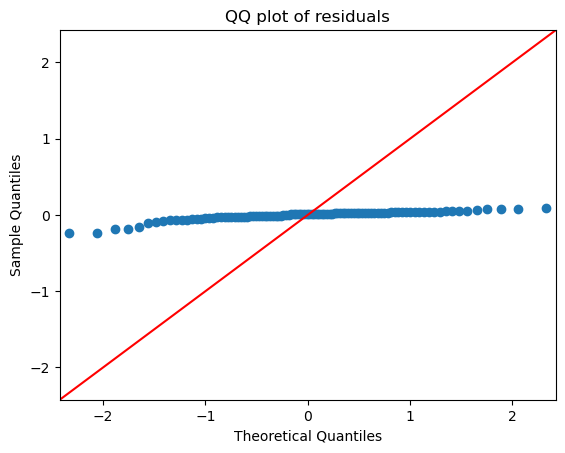

In [300]:
fig = plt.figure(figsize=(10,8)) 
sm.qqplot(residuals_test,line="45")
plt.title("QQ plot of residuals")
plt.show()

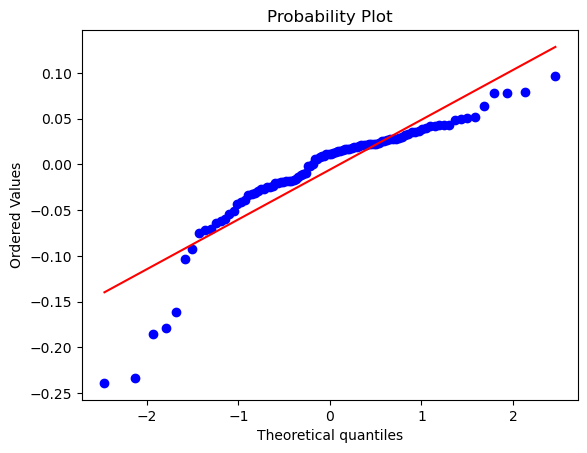

In [359]:
import scipy.stats as stats
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.show()

In [325]:
from scipy.stats import shapiro
res = shapiro(residuals_test)
res

ShapiroResult(statistic=0.8361674437632517, pvalue=3.777109890340745e-09)

**From both the plots we can conclude that residuals are not normally distributed, it is slightly left tailed which explain outliers present in the data**

### 5. Heteroskedasticity

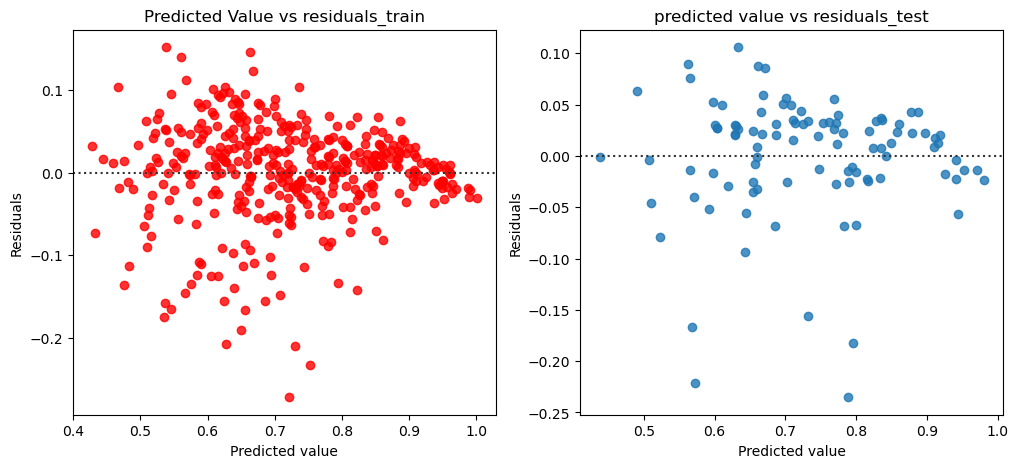

In [374]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.residplot(x=y_pred_train,y=residuals_train,color="r")
plt.xlabel("Predicted value")
plt.ylabel("Residuals")
plt.title("Predicted Value vs residuals_train")
plt.subplot(1,2,2)
sns.residplot(x=y_pred_test,y=residuals_test)
plt.xlabel("Predicted value")
plt.ylabel("Residuals")
plt.title("predicted value vs residuals_test")
plt.show()


In [358]:
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sma.het_goldfeldquandt(residuals_test, X_test_t)
lzip(name, test)

[('F statistic', 0.4170538638157077), ('p-value', 0.9975031369162585)]

**Here null hypothesis is residual terms are homoscedastic and since p-values >0.05,
we fail to reject the null hypothesis so, errors are homoscedastic.Also from residual plot we can see that there  a random scatter around zero which indicates that the homoscedasticity assumption is satisfied.**

## Polynomial Regression

In [395]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [407]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


degrees = 10 
train_scores = []
test_scores = []

train_loss = []
test_loss = []

scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(adj_r(train_score,X_train,y_train))
    test_scores.append(adj_r(test_score,X_test,y_test))

    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    train_loss.append(mean_squared_error(y_train,output1))
    test_loss.append(mean_squared_error(y_test,output2))


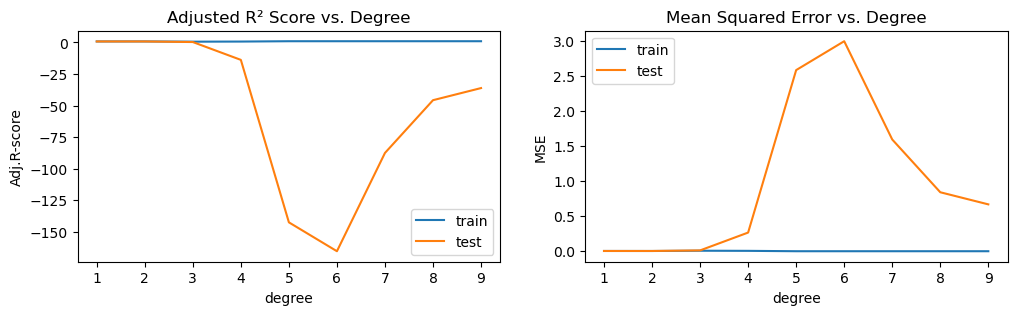

In [419]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, degrees)), train_scores, label="train")
axes[0].plot(list(range(1, degrees)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")
axes[0].set_title("Adjusted R² Score vs. Degree")

axes[1].plot(list(range(1, degrees)), train_loss, label="train")
axes[1].plot(list(range(1, degrees)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")
axes[1].set_title("Mean Squared Error vs. Degree")

plt.show()

**So with increasing degree we are not getting any improvement as such in r2_score as well as MSE. As we go in higher Degree, the model test performance drop significantly Which clearly indicates Overfitting.so we will follow Occam's Razor principle and keep aur degree to 1.**

## Actionable Insights

- From the model we can infer that GRE score, TOEFL score and CGPA are the top three significant factors influencing admission probabilities.
- From VIF we are sure that data has no multicollinearity despite of having good correlation between independent variable and because of which we got a good adj-2-score as well as low MSE.
- Although model initially produced good result but after introducing regularization (Ridge & Lasso) the performance of model did increase.
- From the graph of residuals we can find that there is a bit of skewness in the  data but overall model is producing a good result.
- Also as the train and the test score as well as residuals are almost same acreoss all the models(Linear & OLS) we can safely assume that the model is niether underfitting nor overfitting.
- As we have very less data and the model is explaining around 82% of variance, so in this case we don't need to use polynomial regression for optimization of error.

## Recommendations

- Students should focus more on CGPA and GRE/TOEFL score as it is significantly impacting the chance of admit.
- Also student having research have more chances of admit so they can focus on reserach more. 
- From y_test vs y_pred graph we can see that there are more errors when the chance of admit is less so it needs to be reduced there.
- For reducing error we need more data points around low cahnce of admit area which is < 0.6.
- Also for capturing errors properly especially where chances of admit is less we can use other more complex model which can indentify the pattern better. 
- Some additional features as well as feature engineering can also be done, which can help in understanding data better and covering more variance in the data.